# =========================
# Load libraries
# =========================

In [2]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import keras_metrics as km
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# =========================
# Load DATA
# =========================

In [3]:
# Load gold DATA
data = pd.read_csv("../data/processed/stanford.csv")

train_data, test_data, train_labels, test_labels = train_test_split(
    data["text"], data["label"], test_size=0.2
)

# =========================
# Prepare data
# =========================

In [4]:
# Create unique index for every word and fit to training data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data)

# Turn each tweet into a sequence of integers of equal length
train_sequences = tokenizer.texts_to_sequences(train_data)
train_embeddings = pad_sequences(train_sequences)

# Print the number of unique words found in the data set (not the limit placed
# on the tokenizer), use this as feedback to the num_words arg of Tokenizer().
print("Found %d unique words." % len(tokenizer.word_index))

Found 54336 unique words.


# =========================
# Split data
# =========================

In [5]:
# Randomly shuffle data
indices = np.arange(train_embeddings.shape[0])
np.random.shuffle(indices)
train_embeddings = train_embeddings[indices]
train_labels = train_labels.values[indices]

# Split into training and validation data (approximately 80:20)
x_train = train_embeddings[:10410]
y_train = train_labels[:10410]
x_val = train_embeddings[10410:]
y_val = train_labels[10410:]

# =========================
# Build model
# =========================

In [6]:
# Add Embedding layer
# The final sigmoid layer outputs probability values between [0, 1]
model = models.Sequential()
model.add(layers.Embedding(10000, 8, input_length=train_embeddings.shape[1]))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation="sigmoid"))

# =========================
# Train model
# =========================



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 10410 samples, validate on 14401 samples
Epoch 1/20
10410/10410 [==============================] - 1s 75us/step - loss: 0.6548 - precision: 0.6394 - recall: 0.9872 - val_loss: 0.6403 - val_precision: 0.6359 - val_recall: 0.9999
Epoch 2/20
10410/10410 [==============================] - 0s 40us/step - loss: 0.6291 - precision: 0.6392 - recall: 0.9998 - val_loss: 0.6252 - val_precision: 0.6387 - val_recall: 0.9985
Epoch 3/20
10410/10410 [==============================] - 0s 34us/step - loss: 0.6094 - precision: 0.6702 - recall: 0.9806 - val_loss: 0.6082 - val_precision: 0.6863 - val_recall: 0.9348
Epoch 4/20
10410/10410 [==============================] - 0s 41us/step - loss: 0.5895 - precision: 0.7024 - recall: 0.9328 - val_loss: 0.5947 - val_precision: 0.6950 - val_recall: 0.9241
Epoch 5/20
10410/10410 [==============================] - 1s 48us/step - loss: 0.5701 - precision: 0.7172

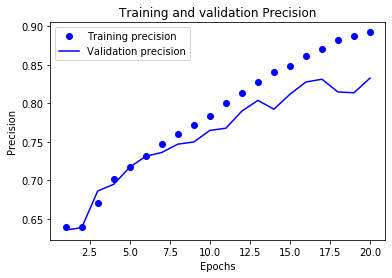

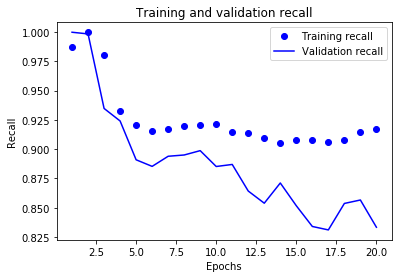

In [7]:
# As the model outputs probabilities, binary crossentropy is the best loss
# metric as it measures the distance between probability distributions
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=[km.binary_precision(), km.binary_recall()],
)

history = model.fit(
    x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val)
)

# Prep history dictionary
precision = history.history["precision"]
val_precision = history.history["val_precision"]
recall = history.history["recall"]
val_recall = history.history["val_recall"]
epochs = range(1, len(precision) + 1)

# Plot the training and validation precision
plt.plot(epochs, precision, "bo", label="Training precision")
plt.plot(epochs, val_precision, "b", label="Validation precision")
plt.title("Training and validation Precision")
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.clf()
plt.plot(epochs, recall, "bo", label="Training recall")
plt.plot(epochs, val_recall, "b", label="Validation recall")
plt.title("Training and validation recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend()
plt.show()

# =========================
# Retrain model
# =========================

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(10000, 8, input_length=train_embeddings.shape[1]))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=[km.binary_precision(), km.binary_recall()],
)

model.fit(x_train, y_train, epochs=20, batch_size=512)

Epoch 1/20
10410/10410 [==============================] - 1s 77us/step - loss: 0.6581 - precision: 0.6387 - recall: 0.9346
Epoch 2/20
10410/10410 [==============================] - 0s 47us/step - loss: 0.6287 - precision: 0.6401 - recall: 1.0000
Epoch 3/20
10410/10410 [==============================] - 1s 56us/step - loss: 0.6093 - precision: 0.6752 - recall: 0.9729
Epoch 4/20
10410/10410 [==============================] - 1s 88us/step - loss: 0.5904 - precision: 0.7025 - recall: 0.9328
Epoch 5/20
10410/10410 [==============================] - 0s 47us/step - loss: 0.5710 - precision: 0.7212 - recall: 0.9165
Epoch 6/20
10410/10410 [==============================] - 0s 47us/step - loss: 0.5491 - precision: 0.7357 - recall: 0.9161
Epoch 7/20
10410/10410 [==============================] - 1s 51us/step - loss: 0.5247 - precision: 0.7494 - recall: 0.9169
Epoch 8/20
10410/10410 [==============================] - 1s 50us/step - loss: 0.4997 - precision: 0.7642 - recall: 0.9185
Epoch 9/20
10410

/home/tcake/coding_projects/python/opt_out/study-online-misogyny/venv/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.302916). Check your callbacks.
  % delta_t_median)
/home/tcake/coding_projects/python/opt_out/study-online-misogyny/venv/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153835). Check your callbacks.
  % delta_t_median)


# =========================
# Evaluate on test data
# =========================

In [ ]:
# DO NOT retrain the tokenizer. Use the argument oov_token=True to reserve a
# token for unkown words. See https://bit.ly/2lNh15g

# Prepare data
# Ensure sequences are padded to the same length as training data
test_sequences = tokenizer.texts_to_sequences(test_data)
test_embeddings = pad_sequences(test_sequences, maxlen=71)

# Print results as ['precision', 'recall'] check names with model.metrics_names
model.evaluate(test_embeddings, test_labels.values)[1:]

